In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bp
import matplotlib.pyplot as plt
import scipy

Prepare the Davis Southern Women network data for analysis.

In [2]:
# Read in the Davis Southern Women Graph
G = nx.davis_southern_women_graph()
women = G.graph['top']  # the women
clubs = G.graph['bottom']  # the events

In [13]:
# print(women)  # 18 women

In [10]:
# print(clubs)  # 14 events

In [23]:
# print(G.edges)

In [11]:
# print(bp.biadjacency_matrix(G, women, clubs))

50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


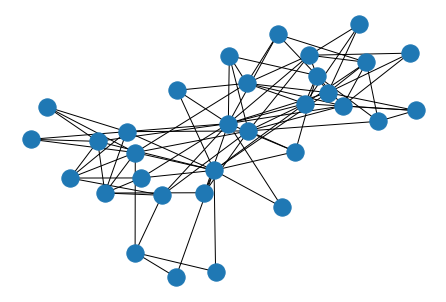

In [27]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bp.weighted_projected_graph(G, women)
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

nx.draw(G)
plt.show()

---
You can ignore what follows

Test out the island method for use in Project 2.

In [20]:
# Function to trim edges non-destrucively based on threshold edge weigh
def trim_edges(graph, weight=1):
    graph_trimmed = net.Graph()
    for u,v,edata in graph.edges(data=True):
        if edata['weight'] > weight:
            graph_trimmed.add_edge(u,v,edata)  # u and v are nodes on edges, edata is edge data 
    return graph_trimmed

def island_method(G, iterations=5):
    weights = [edata['weight'] for u,v,edata in G.edges(data=True)]  # list of weights for all edges
    weight_min = int(min(weights))  # lowest weight
    weight_max = int(max(weights))  # highest weight
    step = int((weight_max - weight_min) / iterations)  # size of the step as function of range and iterations
    return[[threshold, trim_edges(G, threshold)] for threshold in range(weight_min, weight_max, step)]

# G_islands = island_method(...)